# ME5413 Homework 3: Planning

## Task 0: Load the Map

In [10]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import heapq
import itertools
import time
from queue import PriorityQueue
import random
%matplotlib inline

Size of the map: (1000, 1000)
Occupied Cells: 823039
Free Cells: 176961
Cell start is free: True
Cell snacks is free: True
Cell store is free: True
Cell movie is free: True
Cell food is free: True


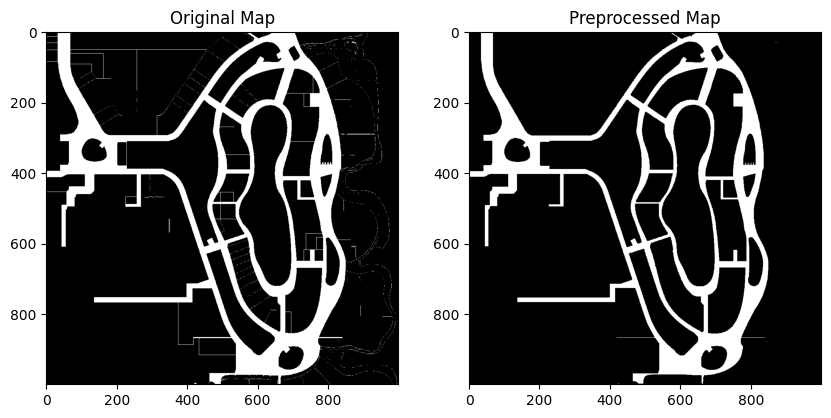

In [7]:
# Load the map
floor_plan = imageio.v2.imread('./map/vivocity.png')
grid_map_img = imageio.v2.imread('./map/vivocity_freespace.png')
grid_map = grid_map_img.transpose()
print("Size of the map:", grid_map.shape)
print("Occupied Cells:", np.count_nonzero(grid_map == 0))
print("Free Cells:", np.count_nonzero(grid_map == 255))

# Map resolution (Constant)
MAP_RES = 0.2 # each cell represents a 0.2m x 0.2m square in reality

# Locations on the map
locations = {'start':  [345, 95],    # Start from the level 2 Escalator
             'snacks': [470, 475],   # Garrett Popcorn
             'store':  [20, 705],    # DJI Store
             'movie':  [940, 545],   # Golden Village
             'food':   [535, 800],   # PUTIEN
            }

# A helper function to mark the locations on the map
def plot_locations(locations: dict, color: 'str'='black'):
    for key, value in locations.items():
        plt.plot(locations[key][0], locations[key][1], marker="o", markersize=10, markeredgecolor="red")
        plt.text(locations[key][0], locations[key][1]-15, s=key, fontsize='x-large', fontweight='bold', c=color, ha='center')
    return


# Check if the designated locations are free
for key, value in locations.items():
    print(f"Cell {key} is free: {grid_map[value[0], value[1]] == 255}")



def preprocess_map_for_width(grid_map, threshold=3):
    """
    预处理地图，只保留宽度大于指定阈值的路径。
    使用简单的腐蚀操作来模拟。
    """
    # 使用腐蚀操作来移除宽度小于threshold的路径
    structure = np.ones((threshold, threshold))
    processed_map = ndimage.binary_erosion(grid_map == 255, structure).astype(grid_map.dtype)
    
    return processed_map * 255

# 假设grid_map是已经加载的地图数据
preprocessed_map = preprocess_map_for_width(grid_map)

# 显示预处理后的地图
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(grid_map, cmap='gray')
plt.title('Original Map')

plt.subplot(1, 2, 2)
plt.imshow(preprocessed_map, cmap='gray')
plt.title('Preprocessed Map')
plt.show()


## Task 1

Path from start to snacks: [(346, 96), (347, 97), (348, 98), (349, 99), (350, 100), (351, 101), (352, 101), (353, 101), (354, 102), (355, 102), (356, 103), (357, 103), (358, 103), (359, 104), (360, 105), (361, 106), (362, 107), (363, 108), (364, 109), (364, 110), (365, 111), (366, 112), (366, 113), (367, 114), (368, 115), (369, 116), (370, 117), (371, 118), (372, 119), (373, 120), (374, 121), (375, 122), (376, 123), (377, 124), (378, 125), (379, 126), (380, 127), (381, 128), (382, 129), (383, 130), (384, 131), (385, 132), (386, 133), (387, 134), (388, 135), (389, 136), (390, 137), (391, 138), (392, 139), (393, 140), (394, 141), (395, 142), (396, 143), (397, 144), (398, 145), (399, 146), (400, 147), (400, 148), (400, 149), (400, 150), (400, 151), (400, 152), (400, 153), (400, 154), (400, 155), (400, 156), (400, 157), (400, 158), (400, 159), (400, 160), (400, 161), (400, 162), (400, 163), (400, 164), (400, 165), (400, 166), (400, 167), (400, 168), (400, 169), (400, 170), (400, 171), (400

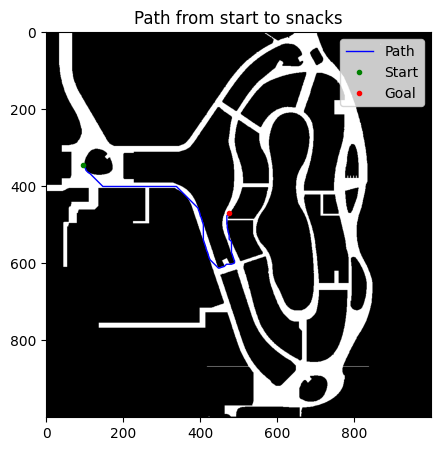

Path from snacks to start: [(471, 474), (472, 473), (473, 472), (474, 471), (475, 470), (476, 469), (477, 469), (478, 469), (479, 469), (480, 469), (481, 469), (482, 469), (483, 469), (484, 469), (485, 469), (486, 469), (487, 469), (488, 469), (489, 469), (490, 469), (491, 469), (492, 469), (493, 469), (494, 469), (495, 469), (496, 469), (497, 469), (498, 469), (499, 469), (500, 469), (501, 469), (502, 469), (503, 469), (504, 469), (505, 469), (506, 469), (507, 469), (508, 469), (509, 469), (510, 469), (511, 469), (512, 469), (513, 469), (514, 469), (515, 469), (516, 469), (517, 469), (518, 469), (519, 469), (520, 469), (521, 469), (522, 469), (523, 469), (524, 469), (525, 469), (526, 469), (527, 469), (528, 469), (529, 469), (530, 469), (531, 469), (532, 469), (533, 469), (534, 469), (535, 469), (536, 469), (537, 469), (538, 469), (539, 469), (540, 470), (541, 470), (542, 471), (543, 471), (544, 471), (545, 471), (546, 472), (547, 472), (548, 473), (549, 473), (550, 473), (551, 473), 

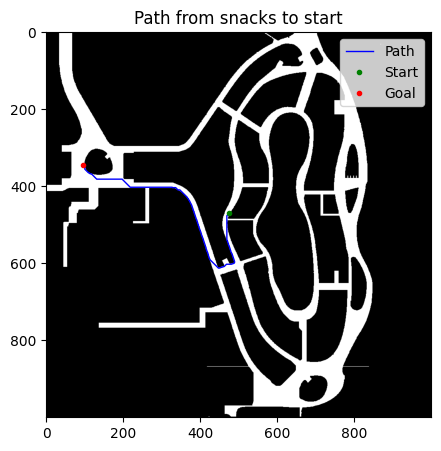

Path from start to store: [(344, 96), (343, 96), (342, 97), (341, 98), (340, 99), (339, 99), (338, 99), (337, 99), (336, 99), (335, 100), (334, 100), (333, 100), (332, 100), (331, 101), (330, 101), (329, 101), (328, 102), (327, 102), (326, 102), (325, 103), (324, 103), (323, 104), (322, 105), (321, 105), (320, 106), (319, 106), (318, 106), (317, 107), (316, 108), (315, 109), (314, 109), (313, 110), (312, 111), (311, 112), (310, 113), (309, 114), (308, 115), (307, 116), (306, 117), (305, 118), (304, 119), (303, 120), (302, 121), (301, 122), (300, 123), (299, 124), (298, 125), (297, 126), (296, 127), (296, 128), (296, 129), (296, 130), (296, 131), (296, 132), (296, 133), (296, 134), (296, 135), (296, 136), (296, 137), (296, 138), (296, 139), (296, 140), (296, 141), (296, 142), (296, 143), (296, 144), (296, 145), (296, 146), (296, 147), (296, 148), (296, 149), (296, 150), (296, 151), (296, 152), (296, 153), (296, 154), (296, 155), (296, 156), (296, 157), (296, 158), (296, 159), (296, 160)

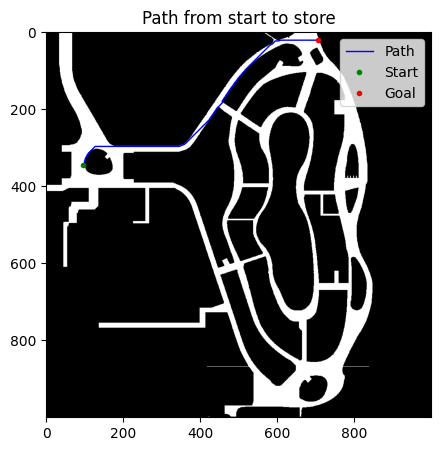

Path from store to start: [(20, 704), (20, 703), (20, 702), (20, 701), (20, 700), (20, 699), (20, 698), (20, 697), (20, 696), (20, 695), (20, 694), (20, 693), (20, 692), (20, 691), (20, 690), (20, 689), (20, 688), (20, 687), (20, 686), (20, 685), (20, 684), (20, 683), (20, 682), (20, 681), (20, 680), (20, 679), (20, 678), (20, 677), (20, 676), (20, 675), (20, 674), (20, 673), (20, 672), (20, 671), (20, 670), (20, 669), (20, 668), (20, 667), (20, 666), (20, 665), (20, 664), (20, 663), (20, 662), (20, 661), (20, 660), (20, 659), (20, 658), (20, 657), (20, 656), (20, 655), (20, 654), (20, 653), (20, 652), (20, 651), (20, 650), (20, 649), (20, 648), (20, 647), (20, 646), (20, 645), (20, 644), (20, 643), (20, 642), (20, 641), (20, 640), (20, 639), (20, 638), (20, 637), (20, 636), (20, 635), (20, 634), (20, 633), (20, 632), (20, 631), (20, 630), (20, 629), (20, 628), (20, 627), (20, 626), (20, 625), (20, 624), (20, 623), (20, 622), (20, 621), (20, 620), (20, 619), (20, 618), (20, 617), (20, 

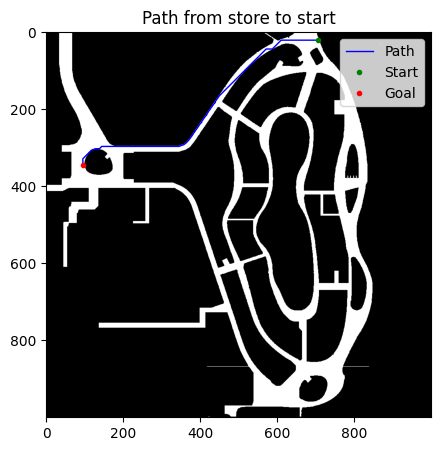

Path from start to movie: [(346, 96), (347, 97), (348, 98), (349, 99), (350, 100), (351, 101), (352, 101), (353, 101), (354, 101), (355, 101), (356, 101), (357, 102), (358, 103), (359, 104), (360, 105), (361, 106), (362, 107), (363, 108), (364, 109), (365, 110), (366, 111), (367, 112), (368, 113), (368, 114), (368, 115), (369, 116), (370, 117), (371, 118), (372, 119), (373, 120), (374, 121), (375, 122), (376, 123), (377, 124), (378, 125), (379, 126), (380, 127), (381, 128), (382, 129), (383, 130), (384, 131), (385, 132), (386, 133), (387, 134), (388, 135), (389, 136), (390, 137), (391, 138), (392, 139), (393, 140), (394, 141), (395, 142), (396, 143), (397, 144), (398, 145), (399, 146), (400, 147), (401, 148), (402, 149), (403, 150), (404, 151), (404, 152), (404, 153), (404, 154), (404, 155), (404, 156), (404, 157), (404, 158), (404, 159), (404, 160), (404, 161), (404, 162), (404, 163), (404, 164), (404, 165), (404, 166), (404, 167), (404, 168), (404, 169), (404, 170), (404, 171), (404,

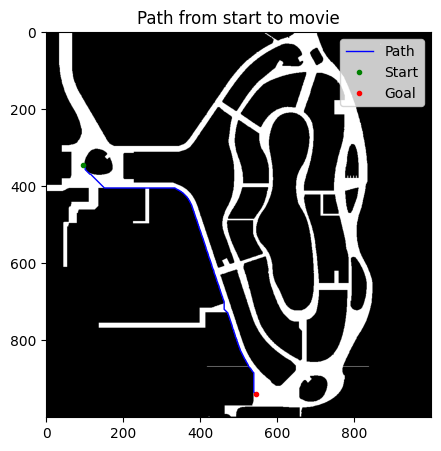

Path from movie to start: [(939, 545), (938, 545), (937, 545), (936, 545), (935, 545), (934, 545), (933, 545), (932, 545), (931, 545), (930, 545), (929, 545), (928, 545), (927, 545), (926, 545), (925, 545), (924, 545), (923, 545), (922, 545), (921, 545), (920, 545), (919, 545), (918, 545), (917, 545), (916, 545), (915, 545), (914, 545), (913, 545), (912, 545), (911, 545), (910, 545), (909, 545), (908, 545), (907, 545), (906, 545), (905, 545), (904, 545), (903, 545), (902, 545), (901, 545), (900, 545), (899, 545), (898, 545), (897, 545), (896, 545), (895, 545), (894, 545), (893, 545), (892, 545), (891, 545), (890, 545), (889, 545), (888, 545), (887, 545), (886, 545), (885, 545), (884, 545), (883, 545), (882, 545), (881, 545), (880, 545), (879, 545), (878, 545), (877, 545), (876, 545), (875, 545), (874, 545), (873, 545), (872, 545), (871, 545), (870, 545), (869, 545), (868, 544), (867, 543), (866, 542), (865, 541), (864, 540), (863, 539), (862, 538), (861, 537), (860, 536), (859, 535), (

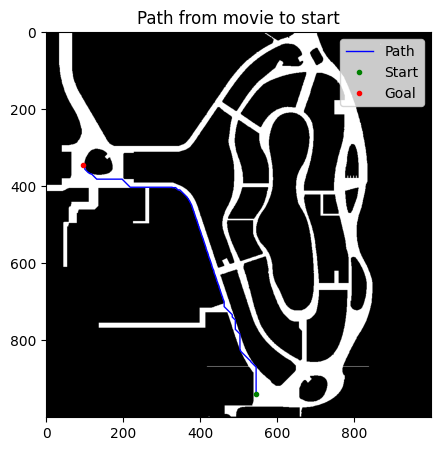

Path from start to food: [(344, 96), (343, 96), (342, 97), (341, 98), (340, 99), (339, 99), (338, 99), (337, 99), (336, 99), (335, 100), (334, 100), (333, 100), (332, 100), (331, 101), (330, 101), (329, 101), (328, 102), (327, 102), (326, 102), (325, 103), (324, 103), (323, 104), (322, 105), (321, 105), (320, 106), (319, 106), (318, 106), (317, 107), (316, 108), (315, 109), (314, 109), (313, 110), (312, 111), (311, 112), (310, 113), (309, 114), (308, 115), (307, 116), (306, 117), (306, 118), (305, 119), (305, 120), (304, 121), (304, 122), (304, 123), (304, 124), (303, 125), (303, 126), (302, 127), (302, 128), (302, 129), (302, 130), (302, 131), (302, 132), (302, 133), (302, 134), (302, 135), (302, 136), (302, 137), (302, 138), (302, 139), (302, 140), (302, 141), (302, 142), (302, 143), (302, 144), (302, 145), (302, 146), (302, 147), (302, 148), (302, 149), (302, 150), (302, 151), (302, 152), (302, 153), (302, 154), (302, 155), (302, 156), (302, 157), (302, 158), (302, 159), (302, 160),

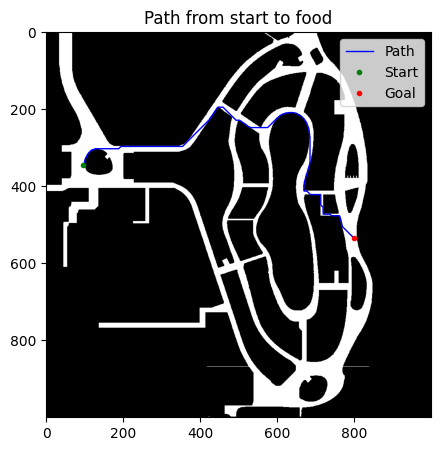

Path from food to start: [(534, 799), (533, 798), (532, 797), (531, 796), (530, 795), (529, 794), (528, 793), (527, 792), (526, 791), (525, 790), (524, 790), (523, 790), (522, 790), (521, 790), (520, 790), (519, 790), (518, 790), (517, 790), (516, 790), (515, 790), (514, 790), (513, 790), (512, 790), (511, 790), (510, 790), (509, 790), (508, 790), (507, 790), (506, 789), (505, 788), (504, 787), (503, 786), (502, 785), (501, 784), (500, 783), (499, 782), (498, 781), (497, 780), (496, 779), (495, 778), (494, 777), (493, 776), (492, 775), (491, 774), (490, 773), (489, 772), (488, 771), (487, 770), (486, 769), (485, 768), (484, 767), (483, 766), (482, 765), (481, 764), (480, 763), (479, 763), (478, 762), (477, 762), (476, 761), (475, 760), (474, 759), (473, 758), (472, 757), (472, 756), (472, 755), (472, 754), (472, 753), (472, 752), (472, 751), (472, 750), (472, 749), (472, 748), (472, 747), (472, 746), (472, 745), (472, 744), (472, 743), (472, 742), (472, 741), (472, 740), (472, 739), (4

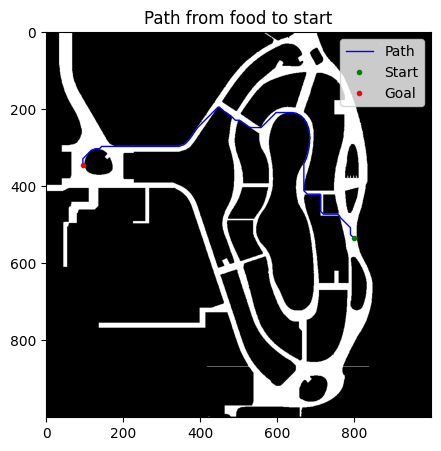

Path from snacks to store: [(469, 475), (468, 475), (467, 475), (466, 475), (465, 475), (464, 475), (463, 476), (462, 477), (461, 477), (460, 477), (459, 477), (458, 477), (457, 477), (456, 477), (455, 477), (454, 478), (453, 478), (452, 478), (451, 478), (450, 478), (449, 478), (448, 478), (447, 478), (446, 478), (445, 478), (444, 478), (443, 478), (442, 478), (441, 478), (440, 478), (439, 478), (438, 479), (437, 479), (436, 479), (435, 480), (434, 480), (433, 480), (432, 481), (431, 481), (430, 482), (429, 482), (428, 482), (427, 483), (426, 483), (425, 483), (424, 483), (423, 484), (422, 484), (421, 484), (420, 484), (419, 484), (418, 485), (417, 485), (416, 485), (415, 485), (414, 485), (413, 486), (412, 486), (411, 487), (410, 487), (409, 487), (408, 487), (407, 487), (406, 487), (405, 487), (404, 487), (403, 487), (402, 488), (401, 488), (400, 488), (399, 488), (398, 488), (397, 488), (396, 488), (395, 488), (394, 488), (393, 488), (392, 488), (391, 488), (390, 488), (389, 488), 

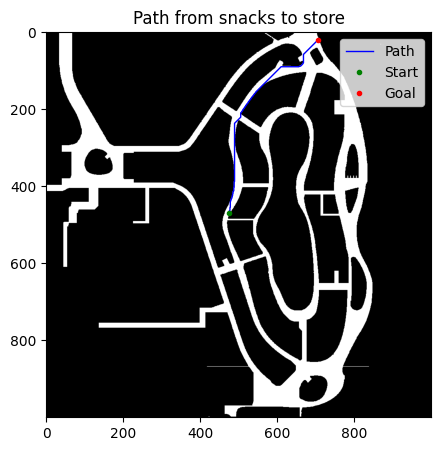

Path from store to snacks: [(21, 704), (22, 703), (23, 702), (24, 701), (25, 700), (26, 699), (27, 698), (28, 697), (29, 696), (30, 695), (31, 694), (32, 693), (33, 692), (34, 691), (35, 691), (36, 691), (37, 691), (38, 691), (39, 691), (40, 691), (41, 691), (42, 691), (43, 691), (44, 691), (45, 690), (46, 689), (47, 688), (48, 687), (49, 686), (50, 685), (51, 684), (52, 683), (53, 682), (54, 681), (55, 680), (56, 679), (57, 678), (58, 677), (59, 676), (60, 675), (61, 674), (62, 673), (63, 672), (64, 671), (65, 670), (66, 670), (67, 670), (68, 670), (69, 670), (70, 670), (71, 669), (72, 669), (73, 669), (74, 669), (75, 669), (76, 669), (77, 669), (78, 669), (79, 668), (80, 667), (81, 666), (82, 666), (83, 665), (84, 664), (85, 663), (86, 662), (87, 661), (88, 660), (89, 659), (90, 658), (91, 657), (92, 656), (93, 655), (94, 654), (95, 653), (96, 652), (97, 651), (98, 650), (99, 649), (100, 648), (101, 647), (102, 646), (103, 645), (104, 644), (105, 643), (106, 642), (107, 641), (107, 6

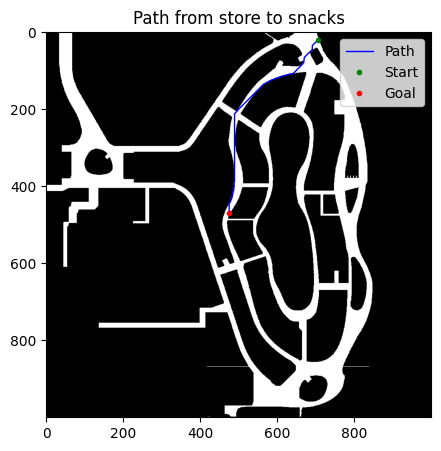

Path from snacks to movie: [(471, 475), (472, 475), (473, 475), (474, 474), (475, 473), (476, 472), (477, 472), (478, 472), (479, 472), (480, 472), (481, 472), (482, 472), (483, 472), (484, 472), (485, 472), (486, 472), (487, 472), (488, 471), (489, 470), (490, 470), (491, 470), (492, 470), (493, 469), (494, 469), (495, 469), (496, 469), (497, 469), (498, 469), (499, 469), (500, 469), (501, 469), (502, 469), (503, 469), (504, 469), (505, 469), (506, 469), (507, 469), (508, 470), (509, 471), (510, 471), (511, 471), (512, 471), (513, 471), (514, 471), (515, 471), (516, 471), (517, 471), (518, 471), (519, 471), (520, 471), (521, 471), (522, 471), (523, 472), (524, 473), (525, 474), (526, 475), (527, 475), (528, 475), (529, 475), (530, 475), (531, 475), (532, 475), (533, 475), (534, 475), (535, 476), (536, 477), (537, 478), (538, 479), (539, 479), (540, 479), (541, 479), (542, 479), (543, 479), (544, 479), (545, 479), (546, 480), (547, 481), (548, 482), (549, 483), (550, 483), (551, 483), 

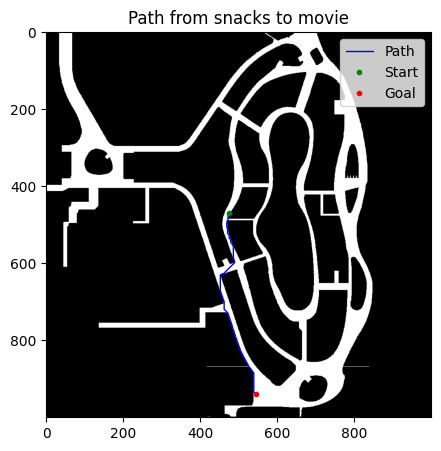

Path from movie to snacks: [(939, 544), (938, 544), (937, 544), (936, 544), (935, 544), (934, 544), (933, 544), (932, 544), (931, 544), (930, 544), (929, 544), (928, 544), (927, 544), (926, 544), (925, 544), (924, 544), (923, 544), (922, 544), (921, 544), (920, 544), (919, 544), (918, 544), (917, 544), (916, 544), (915, 544), (914, 544), (913, 544), (912, 544), (911, 544), (910, 544), (909, 544), (908, 544), (907, 543), (906, 542), (905, 541), (904, 540), (903, 539), (902, 539), (901, 539), (900, 539), (899, 539), (898, 539), (897, 539), (896, 539), (895, 539), (894, 539), (893, 539), (892, 539), (891, 539), (890, 539), (889, 539), (888, 539), (887, 539), (886, 539), (885, 539), (884, 539), (883, 538), (882, 537), (881, 537), (880, 537), (879, 537), (878, 536), (877, 535), (876, 534), (875, 533), (874, 533), (873, 533), (872, 533), (871, 533), (870, 533), (869, 533), (868, 533), (867, 533), (866, 533), (865, 533), (864, 533), (863, 533), (862, 533), (861, 533), (860, 533), (859, 533), 

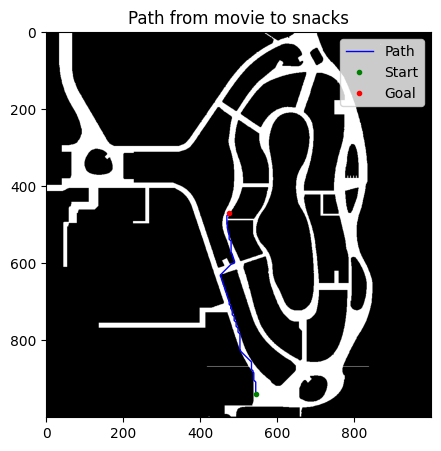

Path from snacks to food: [(471, 475), (472, 475), (473, 475), (474, 474), (475, 473), (476, 472), (477, 472), (478, 472), (479, 472), (480, 472), (481, 472), (482, 472), (483, 472), (484, 472), (485, 473), (485, 474), (485, 475), (485, 476), (485, 477), (485, 478), (485, 479), (485, 480), (485, 481), (485, 482), (485, 483), (485, 484), (485, 485), (485, 486), (485, 487), (485, 488), (485, 489), (485, 490), (485, 491), (485, 492), (485, 493), (485, 494), (485, 495), (485, 496), (485, 497), (485, 498), (485, 499), (485, 500), (485, 501), (485, 502), (485, 503), (485, 504), (485, 505), (485, 506), (485, 507), (485, 508), (485, 509), (485, 510), (485, 511), (485, 512), (485, 513), (485, 514), (485, 515), (485, 516), (485, 517), (485, 518), (485, 519), (485, 520), (485, 521), (485, 522), (485, 523), (485, 524), (485, 525), (485, 526), (485, 527), (485, 528), (485, 529), (485, 530), (485, 531), (485, 532), (485, 533), (485, 534), (486, 535), (487, 536), (488, 537), (489, 538), (490, 539), (

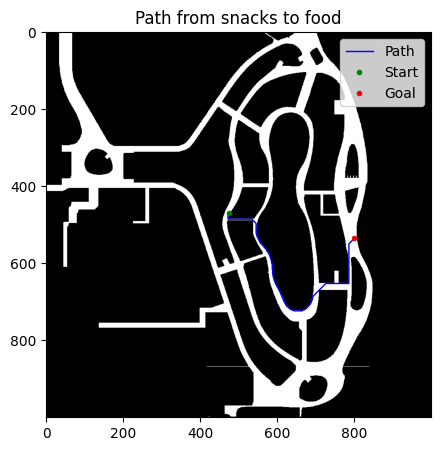

Path from food to snacks: [(536, 799), (537, 799), (538, 799), (539, 799), (540, 799), (541, 799), (542, 799), (543, 799), (544, 799), (545, 799), (546, 799), (547, 799), (548, 799), (549, 799), (550, 799), (551, 799), (552, 799), (553, 799), (554, 799), (555, 799), (556, 799), (557, 799), (558, 799), (559, 799), (560, 799), (561, 799), (562, 799), (563, 799), (564, 799), (565, 799), (566, 799), (567, 799), (568, 798), (569, 797), (570, 796), (571, 795), (572, 794), (573, 793), (574, 792), (575, 791), (576, 790), (577, 789), (578, 788), (579, 787), (580, 786), (581, 786), (582, 786), (583, 786), (584, 786), (585, 786), (586, 786), (587, 786), (588, 786), (589, 786), (590, 786), (591, 786), (592, 786), (593, 786), (594, 786), (595, 786), (596, 786), (597, 786), (598, 786), (599, 786), (600, 786), (601, 786), (602, 786), (603, 786), (604, 786), (605, 786), (606, 786), (607, 786), (608, 786), (609, 786), (610, 786), (611, 786), (612, 786), (613, 786), (614, 786), (615, 786), (616, 786), (

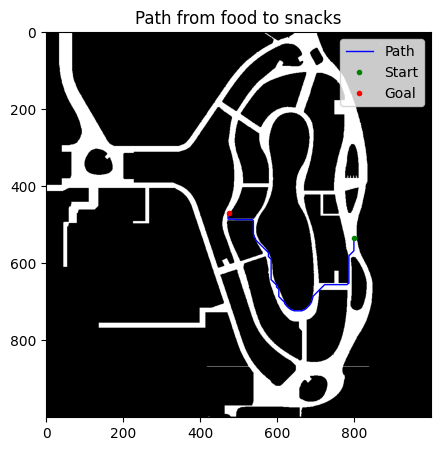

Path from store to movie: [(21, 704), (22, 703), (23, 702), (24, 701), (25, 700), (26, 699), (27, 698), (28, 697), (29, 696), (30, 695), (31, 694), (32, 693), (33, 692), (34, 691), (35, 690), (36, 690), (37, 690), (38, 690), (39, 690), (40, 690), (41, 690), (42, 690), (43, 690), (44, 690), (45, 690), (46, 689), (47, 688), (48, 687), (49, 686), (50, 685), (51, 684), (52, 683), (53, 682), (54, 681), (55, 680), (56, 679), (57, 678), (58, 677), (59, 676), (60, 676), (61, 676), (62, 676), (63, 676), (64, 676), (65, 676), (66, 676), (67, 676), (68, 676), (69, 676), (70, 676), (71, 676), (72, 676), (73, 676), (74, 676), (75, 676), (76, 676), (77, 676), (78, 676), (79, 676), (80, 676), (81, 676), (82, 676), (83, 676), (84, 676), (85, 676), (86, 676), (87, 676), (88, 676), (89, 676), (90, 676), (91, 676), (92, 676), (93, 676), (94, 676), (95, 676), (96, 676), (97, 676), (98, 676), (99, 676), (100, 676), (101, 676), (102, 676), (103, 676), (104, 676), (105, 676), (106, 676), (107, 676), (108, 67

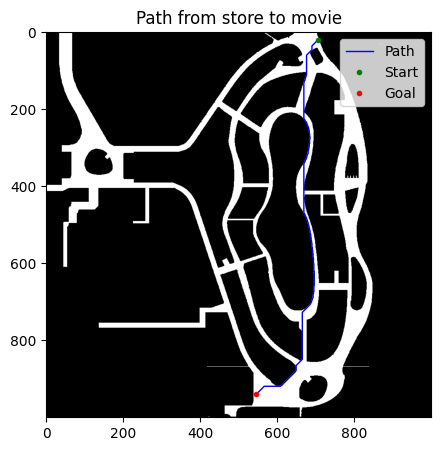

Path from movie to store: [(939, 546), (939, 547), (939, 548), (939, 549), (939, 550), (939, 551), (939, 552), (939, 553), (939, 554), (939, 555), (939, 556), (939, 557), (939, 558), (939, 559), (939, 560), (939, 561), (939, 562), (939, 563), (939, 564), (939, 565), (939, 566), (939, 567), (939, 568), (939, 569), (939, 570), (939, 571), (939, 572), (939, 573), (939, 574), (939, 575), (939, 576), (939, 577), (938, 578), (937, 579), (936, 580), (935, 581), (934, 582), (933, 583), (932, 584), (931, 585), (930, 586), (929, 587), (928, 588), (927, 589), (926, 590), (925, 591), (924, 592), (923, 593), (922, 594), (921, 595), (920, 596), (919, 597), (919, 598), (919, 599), (919, 600), (919, 601), (919, 602), (919, 603), (919, 604), (919, 605), (919, 606), (919, 607), (919, 608), (918, 609), (917, 610), (917, 611), (916, 612), (915, 613), (914, 614), (913, 615), (912, 616), (911, 617), (910, 618), (909, 619), (908, 620), (907, 621), (906, 622), (905, 623), (904, 624), (903, 625), (902, 626), (

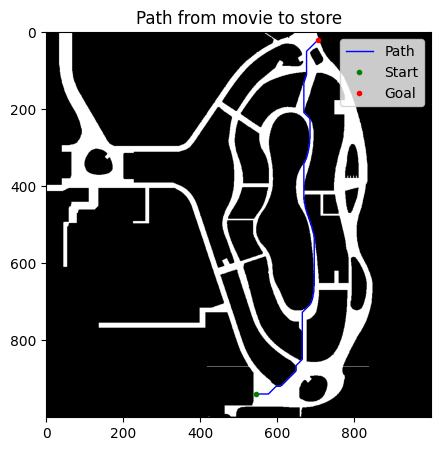

Path from store to food: [(21, 706), (22, 707), (23, 708), (24, 709), (25, 710), (26, 710), (27, 710), (28, 710), (29, 710), (30, 710), (31, 710), (32, 710), (33, 710), (34, 710), (35, 710), (36, 710), (37, 710), (38, 710), (39, 710), (40, 710), (41, 710), (42, 710), (43, 710), (44, 710), (45, 710), (46, 710), (47, 711), (48, 712), (49, 713), (50, 714), (51, 715), (52, 716), (53, 717), (54, 718), (55, 719), (56, 719), (57, 720), (58, 721), (59, 722), (60, 723), (61, 724), (62, 725), (63, 726), (64, 727), (65, 728), (66, 729), (67, 730), (68, 731), (69, 732), (70, 733), (71, 734), (72, 734), (73, 735), (74, 736), (75, 737), (76, 738), (77, 739), (78, 740), (79, 741), (80, 742), (81, 743), (82, 744), (83, 745), (84, 746), (85, 747), (86, 748), (87, 749), (88, 750), (89, 751), (90, 752), (91, 753), (92, 754), (93, 755), (94, 756), (95, 757), (96, 758), (97, 759), (98, 759), (99, 759), (100, 759), (101, 759), (102, 759), (103, 759), (104, 759), (105, 760), (106, 761), (107, 762), (108, 763

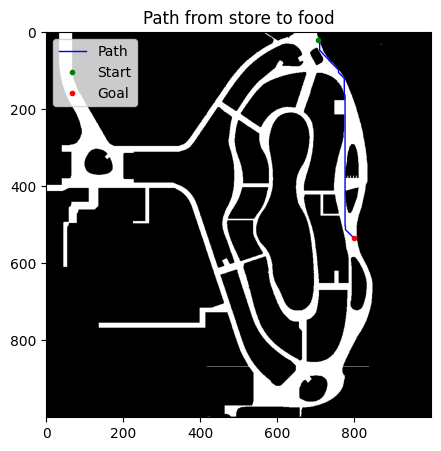

Path from food to store: [(534, 799), (533, 799), (532, 799), (531, 799), (530, 799), (529, 799), (528, 799), (527, 799), (526, 799), (525, 799), (524, 799), (523, 799), (522, 799), (521, 799), (520, 799), (519, 799), (518, 799), (517, 799), (516, 799), (515, 799), (514, 799), (513, 799), (512, 799), (511, 799), (510, 799), (509, 799), (508, 799), (507, 799), (506, 799), (505, 799), (504, 799), (503, 799), (502, 798), (501, 797), (500, 796), (499, 795), (498, 794), (497, 793), (496, 792), (495, 791), (494, 790), (493, 790), (492, 790), (491, 790), (490, 790), (489, 790), (488, 790), (487, 790), (486, 790), (485, 790), (484, 790), (483, 790), (482, 790), (481, 790), (480, 790), (479, 790), (478, 790), (477, 790), (476, 790), (475, 790), (474, 789), (473, 788), (472, 787), (471, 786), (470, 785), (469, 784), (468, 783), (467, 782), (466, 781), (465, 780), (464, 779), (463, 778), (462, 777), (461, 776), (460, 776), (459, 776), (458, 776), (457, 776), (456, 776), (455, 776), (454, 776), (4

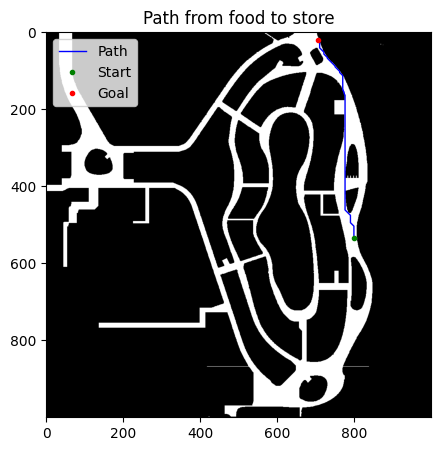

Path from movie to food: [(939, 546), (939, 547), (939, 548), (939, 549), (939, 550), (939, 551), (939, 552), (939, 553), (939, 554), (939, 555), (939, 556), (939, 557), (939, 558), (939, 559), (939, 560), (939, 561), (939, 562), (939, 563), (939, 564), (939, 565), (939, 566), (939, 567), (939, 568), (939, 569), (939, 570), (939, 571), (939, 572), (939, 573), (939, 574), (939, 575), (939, 576), (939, 577), (938, 578), (937, 579), (936, 580), (935, 581), (934, 582), (933, 583), (932, 584), (931, 585), (930, 586), (929, 587), (928, 588), (927, 589), (926, 590), (925, 591), (924, 592), (923, 593), (922, 594), (921, 595), (920, 596), (919, 597), (919, 598), (919, 599), (919, 600), (919, 601), (919, 602), (919, 603), (919, 604), (919, 605), (919, 606), (919, 607), (919, 608), (918, 609), (917, 610), (917, 611), (916, 612), (915, 613), (914, 614), (913, 615), (912, 616), (911, 617), (910, 618), (909, 619), (908, 620), (907, 621), (906, 622), (905, 623), (904, 624), (903, 625), (902, 626), (9

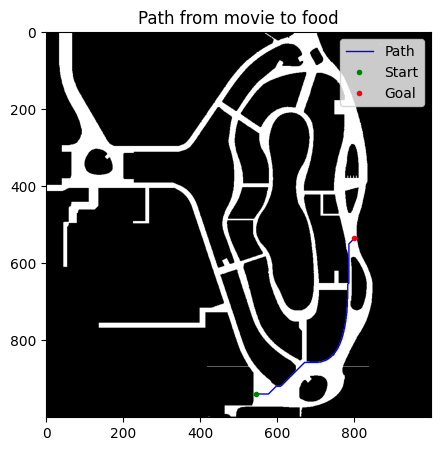

Path from food to movie: [(536, 800), (537, 800), (538, 800), (539, 800), (540, 800), (541, 800), (542, 800), (543, 800), (544, 800), (545, 800), (546, 800), (547, 800), (548, 800), (549, 800), (550, 800), (551, 800), (552, 800), (553, 800), (554, 800), (555, 800), (556, 800), (557, 800), (558, 800), (559, 800), (560, 800), (561, 800), (562, 800), (563, 800), (564, 800), (565, 800), (566, 800), (567, 799), (568, 798), (569, 797), (570, 796), (571, 795), (572, 794), (573, 793), (574, 792), (575, 791), (576, 790), (577, 789), (578, 788), (579, 787), (580, 786), (581, 786), (582, 786), (583, 786), (584, 786), (585, 786), (586, 786), (587, 786), (588, 786), (589, 786), (590, 786), (591, 786), (592, 786), (593, 786), (594, 786), (595, 786), (596, 786), (597, 786), (598, 786), (599, 786), (600, 786), (601, 786), (602, 786), (603, 786), (604, 786), (605, 786), (606, 786), (607, 786), (608, 786), (609, 786), (610, 786), (611, 786), (612, 786), (613, 786), (614, 786), (615, 786), (616, 786), (6

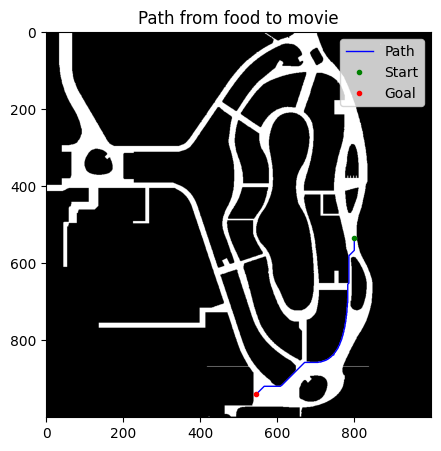

In [3]:


# 假设 grid_map, locations, MAP_RES 已经定义

# def heuristic(a, b):
#     """计算启发式距离，这里使用欧几里得距离作为例子"""
#     return np.sqrt((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2)
def heuristic(a, b):
    dx = abs(a[0] - b[0])
    dy = abs(a[1] - b[1])
    D = 1
    D2 = np.sqrt(2)
    return D * (dx + dy) + (D2 - 2 * D) * min(dx, dy)


def a_star_search(preprocessed_map, start, goal):
    neighbors = [(0, 1), (1, 0), (-1, 0), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    close_set = set()
    came_from = {}
    gscore = {start: 0}
    fscore = {start: heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]

        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data[::-1], len(close_set)

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            
            if 0 <= neighbor[0] < preprocessed_map.shape[0] and 0 <= neighbor[1] < preprocessed_map.shape[1]:
                if preprocessed_map[neighbor[0]][neighbor[1]] <= 0.6:  # 修改了障碍物的检查逻辑
                    continue
            else:
                continue  # out of bounds

            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1] for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor))
    
    return False


def plot_path(preprocessed_map, path, start_pos, goal_pos, filename='path.png'):
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(preprocessed_map, cmap='gray')

    if path:
        y, x = zip(*path)
        ax.plot(x, y, color="blue", linewidth=2, label="Path")
    
    ax.plot(start_pos[1], start_pos[0], 'go', markersize=10, label="Start")
    ax.plot(goal_pos[1], goal_pos[0], 'ro', markersize=10, label="Goal")
    
    ax.legend()
    plt.savefig(filename)
    plt.close()

def calculate_path_distance(path):
    """
    根据8连通的方式计算路径的总距离。
    对角线移动的距离为0.282米，水平或垂直移动的距离为0.2米。
    """
    total_distance = 0.0
    for i in range(len(path) - 1):
        dx = abs(path[i+1][0] - path[i][0])
        dy = abs(path[i+1][1] - path[i][1])
        if dx == 1 and dy == 1:
            # 对角线移动
            total_distance += 0.282
        elif dx == 1 or dy == 1:
            # 水平或垂直移动
            total_distance += 0.2
    return total_distance

# def find_and_save_all_paths(grid_map, locations):
#     for (start_key, start_pos), (goal_key, goal_pos) in itertools.combinations(locations.items(), 2):
#         # 正向搜索：从 start 到 goal
#         start_time = time.time()
#         path, visited = a_star_search(grid_map, tuple(start_pos), tuple(goal_pos))
#         end_time = time.time()

#         total_distance = calculate_path_distance(path)
#         print(f"Path from {start_key} to {goal_key}: {path}")
#         print(f"Total distance from {start_key} to {goal_key}: {total_distance} meters")
#         print(f"Visited Cells from {start_key} to {goal_key}: {visited}")
#         print(f"Time from {start_key} to {goal_key}: {end_time - start_time} seconds")
#         filename = f'path_{start_key}_to_{goal_key}.png'
#         plot_path(grid_map, path, start_pos, goal_pos, filename)
#         print(f"Image saved as '{filename}'")

#         # 反向搜索：从 goal 到 start
#         start_time = time.time()
#         reverse_path, visited = a_star_search(grid_map, tuple(goal_pos), tuple(start_pos))
#         end_time = time.time()

#         total_distance = calculate_path_distance(reverse_path)
#         print(f"Path from {goal_key} to {start_key}: {reverse_path}")
#         print(f"Total distance from {goal_key} to {start_key}: {total_distance} meters")
#         print(f"Visited Cells from {goal_key} to {start_key}: {visited}")
#         print(f"Time from {goal_key} to {start_key}: {end_time - start_time} seconds")
#         reverse_filename = f'path_{goal_key}_to_{start_key}.png'
#         plot_path(grid_map, reverse_path, goal_pos, start_pos, reverse_filename)
#         print(f"Image saved as '{reverse_filename}'\n")

def search_and_plot_path(preprocessed_map, start_pos, goal_pos, start_key, goal_key):
    """执行搜索并绘制路径的函数，同时展示图像"""
    start_time = time.time()
    path, visited = a_star_search(preprocessed_map, start_pos, goal_pos)
    end_time = time.time()

    total_distance = calculate_path_distance(path)
    print(f"Path from {start_key} to {goal_key}: {path}")
    print(f"Total distance from {start_key} to {goal_key}: {total_distance} meters")
    print(f"Visited Cells from {start_key} to {goal_key}: {visited}")
    print(f"Time from {start_key} to {goal_key}: {end_time - start_time} seconds")
    
    filename = f'path_{start_key}_to_{goal_key}.png'
    plot_path(preprocessed_map, path, start_pos, goal_pos, filename)
    print(f"Image saved as '{filename}'\n")
    
    # 展示图像
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.imshow(preprocessed_map, cmap='gray')  # 显示地图

    if path:
        y, x = zip(*path)
        ax.plot(x, y, color="blue", linewidth=1, label="Path")
    
    ax.plot(start_pos[1], start_pos[0], 'go', markersize=3, label="Start")
    ax.plot(goal_pos[1], goal_pos[0], 'ro', markersize=3, label="Goal")
    
    ax.legend()
    plt.title(f"Path from {start_key} to {goal_key}")
    plt.show()

# def search_and_plot_path(grid_map, start_pos, goal_pos, start_key, goal_key):
#     """执行搜索并绘制路径的函数"""
#     start_time = time.time()
#     path, visited = a_star_search(grid_map, start_pos, goal_pos)
#     end_time = time.time()

#     total_distance = calculate_path_distance(path)
#     print(f"Path from {start_key} to {goal_key}: {path}")
#     print(f"Total distance from {start_key} to {goal_key}: {total_distance} meters")
#     print(f"Visited Cells from {start_key} to {goal_key}: {visited}")
#     print(f"Time from {start_key} to {goal_key}: {end_time - start_time} seconds")
    
#     filename = f'path_{start_key}_to_{goal_key}.png'
#     plot_path(grid_map, path, start_pos, goal_pos, filename)
#     print(f"Image saved as '{filename}'\n")

def find_and_save_all_paths(preprocessed_map, locations):
    """为locations中的每对位置执行双向搜索，并保存路径图像"""
    for (start_key, start_pos), (goal_key, goal_pos) in itertools.combinations(locations.items(), 2):
        # 正向搜索：从 start 到 goal
        search_and_plot_path(preprocessed_map, tuple(start_pos), tuple(goal_pos), start_key, goal_key)
        
        # 反向搜索：从 goal 到 start
        search_and_plot_path(preprocessed_map, tuple(goal_pos), tuple(start_pos), goal_key, start_key)



# 调用 find_and_save_all_paths 函数
find_and_save_all_paths(preprocessed_map, locations)


## Task 2

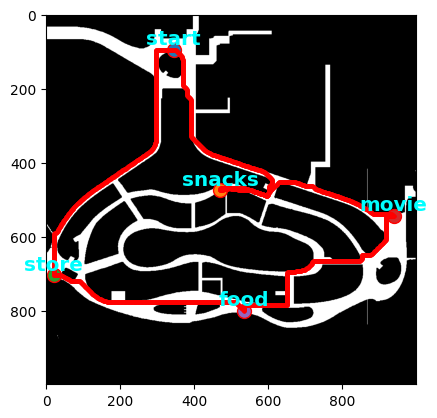

In [9]:

def heuristic(a, b):
    # 使用曼哈顿距离作为启发式函数
    return abs(a[0] - b[0]) + abs(a[1] - b[1])
def get_neighbors(node, preprocessed_map):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # 8方向
        x, y = node[0] + dx, node[1] + dy
        if 0 <= x < preprocessed_map.shape[0] and 0 <= y < preprocessed_map.shape[1] and preprocessed_map[x, y] == 255: # 检查是否在边界内且为自由格
            neighbors.append((x, y))
    return neighbors
def a_star(start, goal, preprocessed_map):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start) # optional
            path.reverse() # optional
            return path

        for neighbor in get_neighbors(current, preprocessed_map):
            tentative_g_score = g_score[current] + heuristic(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                open_set.put((f_score[neighbor], neighbor))

    return []


#task2
locations_pairs = list(itertools.permutations(locations.keys(), 2))
distances = {}

for pair in locations_pairs:
    start, goal = pair
    start_coords = tuple(locations[start])
    goal_coords = tuple(locations[goal])
    path = a_star(start_coords, goal_coords, preprocessed_map)
    distances[pair] = len(path) * MAP_RES  # 假设每步代表0.2m

def nearest_neighbor(start, distances):
    unvisited = set(locations.keys())
    unvisited.remove(start)
    tour = [start]
    current = start
    while unvisited:
        next_destination = min(unvisited, key=lambda x: distances[(current, x)])
        unvisited.remove(next_destination)
        tour.append(next_destination)
        current = next_destination
    tour.append(start) # 回到起点
    return tour

tour = nearest_neighbor('start', distances)

# 可视化
pre_map=preprocessed_map.transpose()
plt.imshow(pre_map, cmap='gray')
plot_locations(locations, color='cyan')

# 绘制路径
# 在可视化之前将路径坐标转置
path_transposed = [(y, x) for x, y in path]
# 绘制路径
for i in range(len(tour) - 1):
    start, end = tour[i], tour[i+1]
    path = a_star(tuple(locations[start]), tuple(locations[end]), preprocessed_map)
    path_transposed = [(y, x) for x, y in path]  # 转置路径坐标
    for point in path_transposed:
        plt.plot(point[1], point[0], 'ro', markersize=2)
plt.show()


# Task 2_ycsf


In [ ]:
#task1结果输入
def heuristic(a, b):
    # 使用曼哈顿距离作为启发式函数
     return abs(a[0] - b[0]) + abs(a[1] - b[1])
def get_neighbors(node, grid_map):
    neighbors = []
    for dx, dy in [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # 8方向
        x, y = node[0] + dx, node[1] + dy
        if 0 <= x < grid_map.shape[0] and 0 <= y < grid_map.shape[1] and grid_map[x, y] == 255: # 检查是否在边界内且为自由格
            neighbors.append((x, y))
    return neighbors
def a_star(start, goal, grid_map):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start) # optional
            path.reverse() # optional
            return path

        for neighbor in get_neighbors(current, grid_map):
            tentative_g_score = g_score[current] + heuristic(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                open_set.put((f_score[neighbor], neighbor))

    return []
distances = {
    ('start', 'snacks'): 141,
    ('start', 'store'): 154,
    ('start', 'movie'): 178,
    ('start', 'food'): 218,
    
    ('snacks', 'start'): 141,
    ('snacks', 'store'): 114,
    ('snacks', 'movie'): 106,
    ('snacks', 'food'): 129,
    
    ('store', 'start'): 154,
    ('store', 'snacks'): 114,
    ('store', 'movie'): 208,
    ('store', 'food'): 110,
    
    ('movie', 'start'): 178,
    ('movie', 'snacks'): 106,
    ('movie', 'store'): 208,
    ('movie', 'food'): 111,
    
    ('food', 'start'): 218,
    ('food', 'snacks'): 129,
    ('food', 'store'): 110,
    ('food', 'movie'): 111,
    }

#task2
#初始化族群
def initialize_population(locations, population_size):
    population = []
    locs = list(locations.keys())
    locs.remove('start')  # We keep 'start' fixed for TSP
    for _ in range(population_size):
        path = locs[:]
        random.shuffle(path)
        path.insert(0, 'start')
        path.append('start')  # Start and end at 'start' location
        population.append(path)
    return population
#计算适应度
def calculate_fitness(path, distances):
    if len(path) <= 1:
        return 0  # 如果路径长度小于或等于 1，则返回 0 作为适应度
    total_distance = 0
    for i in range(len(path) - 1):
        if path[i] == path[i+1]:
            # 如果有连续重复的位置，返回一个非常小的适应度值，或者抛出一个错误
            return 0
        total_distance += distances.get((path[i], path[i+1]), None)
    if total_distance == 0:
        # 再次检查总距离是否为0，这可以帮助调试问题
        return 0
    return 1 / total_distance

#选择过程
def selection(population, fitnesses):
    # 首先，根据适应度计算选择概率
    fitness_total = sum(fitnesses)
    selection_probs = [f / fitness_total for f in fitnesses]
    # 然后，根据概率选择个体的索引
    selected_indices = np.random.choice(range(len(population)), size=len(population), p=selection_probs)
    # 最后，根据选择的索引构建新的种群
    new_population = [population[i] for i in selected_indices]
    return new_population
#交叉过程
def crossover_OX(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(1, size-1), 2))  # 避开起始和结束位置
    child = [None] * size
    # 在子代中填充来自父代1的片段
    child[start:end] = parent1[start:end]
    
    # 从父代2填充剩余位置，跳过已在子代中的元素
    position = end
    for item in parent2[end:] + parent2[1:end]:
        if item not in child:
            if position >= size:
                position = 1  # 回到起点后的第一个位置
            child[position] = item
            position += 1

    child[0] = 'start'  # 确保起点和终点是 'start'
    child[-1] = 'start'
    return child

#变异过程
def mutate(path, mutation_rate):
    path = path[1:-1]  # Remove 'start' and 'end' if they are fixed
    for i in range(len(path)):
        if random.random() < mutation_rate:
            j = random.randint(0, len(path) - 1)
            path[i], path[j] = path[j], path[i]
    return ['start'] + path + ['start']  # Add 'start' and 'end' back if needed
#修复路径
def fix_path(path):
    # 获取路径中唯一的位置
    unique_locations = set(path[1:-1])  # 排除起始和结束位置 'start'
    # 计算缺失的位置
    missing_locations = set(locations.keys()) - unique_locations - {'start'}

    # 创建一个新的路径，避免直接修改输入的路径
    fixed_path = ['start']

    for location in path[1:-1]:  # 排除起始和结束位置 'start'
        if location in fixed_path:
            if missing_locations:
                # 如果有缺失的位置，则用一个缺失的位置替换
                fixed_path.append(missing_locations.pop())
            else:
                # 如果没有缺失的位置可用（理论上不应该发生），打印错误或采取其他措施
                print("Error: No missing location to replace duplicate.")
        else:
            fixed_path.append(location)

    fixed_path.append('start')  # 重新添加结束位置 'start'
    return fixed_path

# 遗传算法的主函数
def genetic_algorithm(locations, distances, population_size, generations, mutation_rate):
    population = initialize_population(locations, population_size)
    for _ in range(generations):
        fitnesses = [calculate_fitness(p, distances) for p in population]

        # 选择
        new_population = selection(population, fitnesses)

        # 交叉和变异
        children = []
        for i in range(0, len(new_population), 2):
            parent1, parent2 = new_population[i], new_population[i + 1]
            
            # 应用交叉
            child1 = crossover_OX(parent1, parent2)
            child2 = crossover_OX(parent2, parent1)
            
            # 应用变异
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            
            # 修复路径 - 确保路径有效
            child1 = fix_path(child1)
            child2 = fix_path(child2)
            
            children.extend([child1, child2])
        
        population = children

    # 找到并返回最佳路径
    best_fitness = max([calculate_fitness(p, distances) for p in population])
    best_path = fitnesses.index(best_fitness)
    return population[best_path]
# Run the genetic algorithm to get the best path
best_path = genetic_algorithm(locations, distances, population_size=100, generations=1000, mutation_rate=0.01)
# Now let's run the GA
#best_path = genetic_algorithm(locations, distances, population_size=100, generations=1000, mutation_rate=0.01)

# Visualization or other use of best_path
def visualize_path(best_path, locations, grid_map):
    plt.figure(figsize=(10, 6))
    plt.imshow(grid_map_img, cmap='gray')
    plot_locations(locations, color='cyan')
    
    # Iterate through the best path and use A* to find the actual path
    for i in range(len(best_path) - 1):
        start = best_path[i]
        end = best_path[i + 1]
        start_coords = locations[start]
        end_coords = locations[end]
        
        # Convert the location coordinates to grid indices
        start_grid = (start_coords[0], start_coords[1])  
        end_grid = (end_coords[0], end_coords[1])        
        # Get the actual path from the A* algorithm
        actual_path = a_star(start_grid, end_grid, grid_map)
        
        
        # Plot the actual path
        for j in range(len(actual_path) - 1):
            plt.plot(
                [actual_path[j][0], actual_path[j+1][0]],  
                [ actual_path[j][1], actual_path[j+1][1]],  'ro-'  )
    
    plt.show()




# Visualize the path using the A* algorithm for pathfinding
visualize_path(best_path, locations, grid_map)
print("Best Path:", best_path)